In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
# plt.style.use('default')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

# [3월 4일]
---

## # 회귀
---
- 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있다.
 - 예) 소득이 증가하면 소비도 증가
- 두 변수 사이에 1:1로 대응하는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 한다.
- 변수 X, Y에 대한 정보를 가지고 1차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘이다.

### # 회귀 평균 지표
---
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R$^2$ : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 한다.
 - 설명력이라 한다.
 - 1에 가까울수록 예측 정확도가 높다. (예측값 Variance / 실제값 Variance)

In [443]:
df = pd.read_excel('../data/auto-mpg.xlsx')
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf = ndf.drop(ndf.loc[ndf['horsepower'] == '?'].index)
# ndf = ndf.convert_dtypes()
ndf['horsepower'] = ndf['horsepower'].astype('int')
ndf.info()

ndf.to_pickle('../data/auto_mpg.pkl')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    int32  
 3   weight      392 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 13.8 KB


### # 단순 선형 회귀분석
---

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

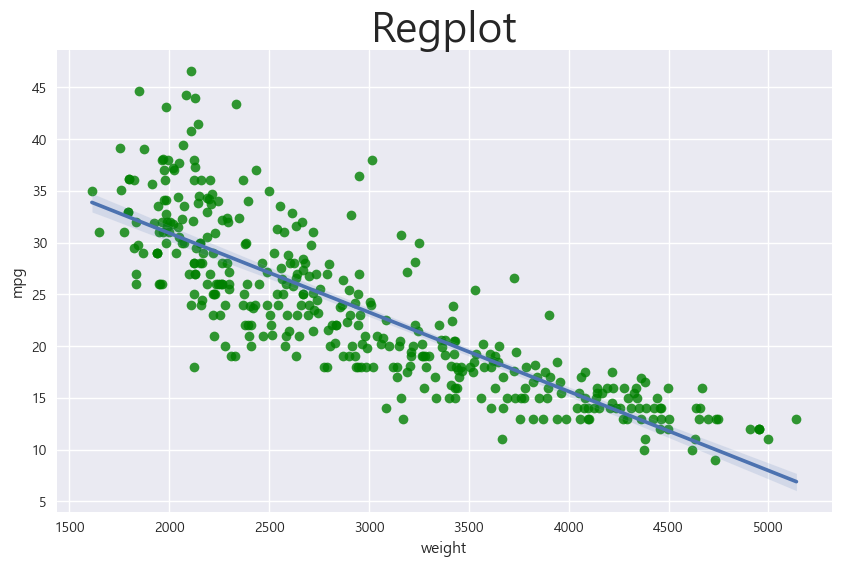

In [444]:
X = ndf[['weight']]
y = ndf[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 11)

# sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
# lr.fit(X_train, y_train).coef_
# print(lr.coef_)
print(f'기울기 : {lr.coef_}')
print(f'y절편 : {lr.intercept_}')

기울기 : [-0.60691288 -0.03714088 -0.00522268]
y절편 : 46.414351269634025


In [446]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_preds)

print(f'mse : {mse}, rmse : {rmse}, r_squared : {r_square}')

mse : 22.168955157340807, rmse : 4.70839199274453, r_squared : 0.6410608728212728


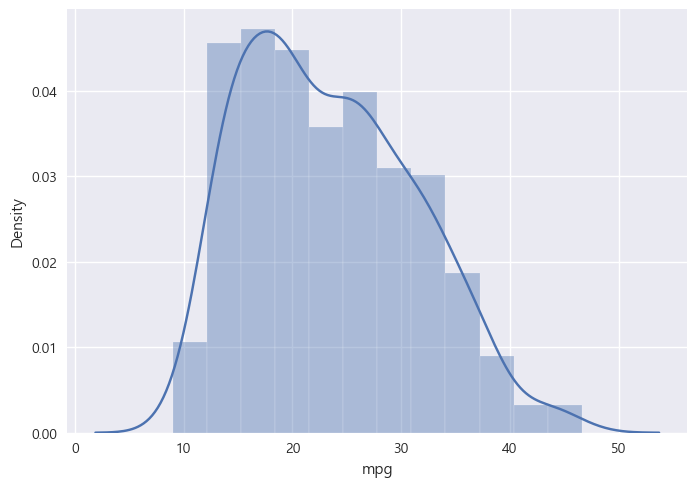

In [447]:
# 원본 데이터 종속 변수의 분포

a = sns.distplot(y)
plt.xlabel('mpg')
plt.show()

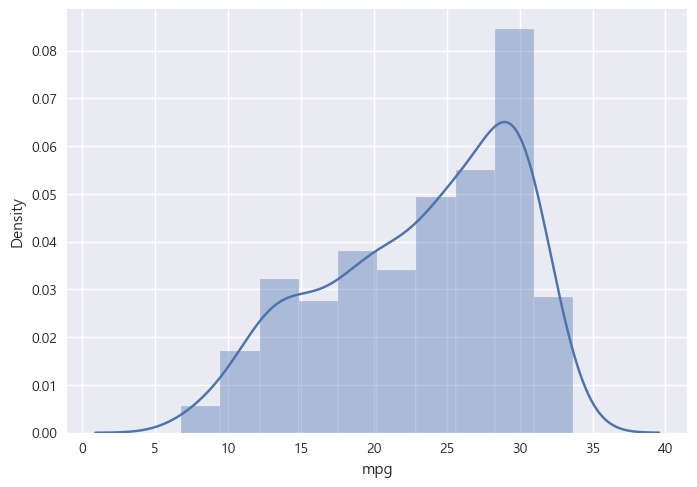

In [448]:
# 학습 모델에 따라 예측한 종속 변수의 분포

y_hat = lr.predict(X)
sns.distplot(y_hat, kde = True)
plt.xlabel('mpg')
plt.show()

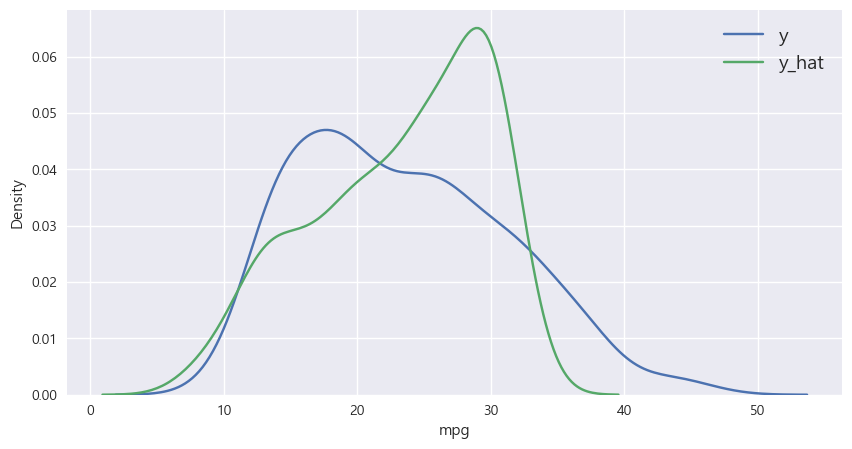

In [449]:
# 합쳐서 보기

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False, label='y')
ax2 = sns.distplot(y_hat,hist=False, label='y_hat')
plt.xlabel('mpg')
plt.legend(fontsize = 14)
plt.show()
plt.close()

### # 다항 회귀분석
---
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있다.
- 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀이며 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관하다.

In [462]:
df = pd.read_pickle('../data/auto_mpg.pkl')
display(df.head())

X = ndf[['weight']]
y = ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 11)

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [463]:
X_train.shape

(274, 1)

In [464]:
from sklearn.preprocessing import PolynomialFeatures

# 차수를 다항식으로 변환하여 생성하는 객체
poly = PolynomialFeatures(degree = 2) # degree : 차수 지정
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)
print(X_train_poly[:5], '\n')

# 차수 확인
print(poly.get_feature_names())

(274, 1)
(274, 3)
[[1.0000000e+00 2.1200000e+03 4.4944000e+06]
 [1.0000000e+00 4.4990000e+03 2.0241001e+07]
 [1.0000000e+00 1.8450000e+03 3.4040250e+06]
 [1.0000000e+00 2.0450000e+03 4.1820250e+06]
 [1.0000000e+00 1.9850000e+03 3.9402250e+06]] 

['1', 'x0', 'x0^2']


In [465]:
# 2차 다항식 형태의 r^2

pr = LinearRegression()

pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square

0.6368479947376222

In [466]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.12274142723444


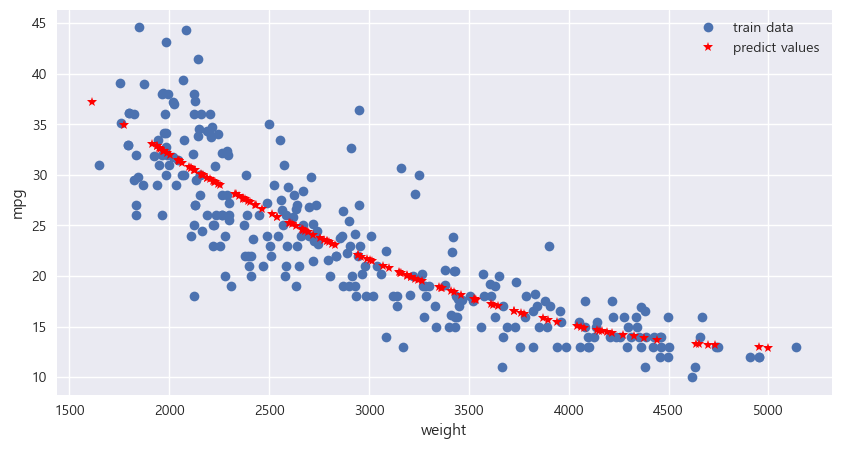

In [467]:
y_preds_poly = pr.predict(X_test_poly)
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
# ax.plot(X_train, y_train, linestyle = '', marker = 'o', label = 'train data')
# ax.plot(X_test, y_hat_test, linestyle = '', marker = '*', color = 'r', label = 'predict values')
ax.plot(X_train, y_train, 'o', label = 'train data')
ax.plot(X_test, y_preds_poly,'r*',label = 'predict values')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

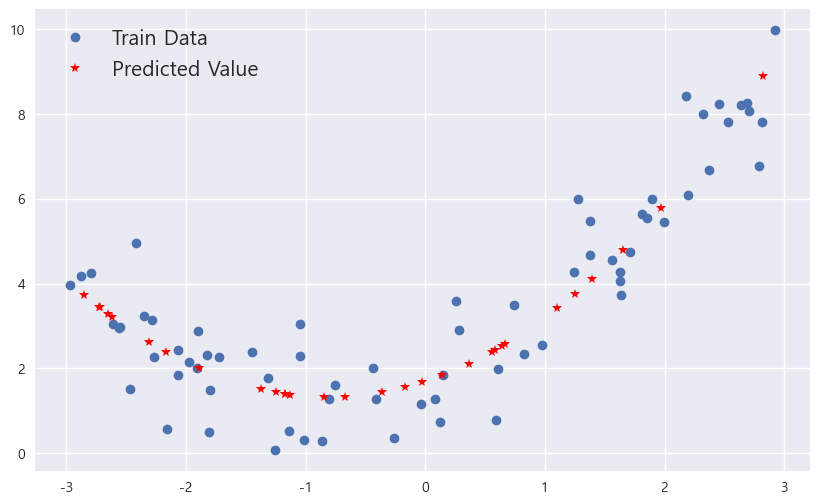

In [468]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)

# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds_poly = lr.predict(X_test_poly)

# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train,'o',label='Train Data')
ax.plot(X_test, y_preds_poly,'r*', label='Predicted Value')
ax.legend(fontsize = 15, loc='best')
plt.show()
plt.close()

### # 다중 회귀분석
---
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우 다중 회귀분석을 사용한다.
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성한다.

In [2]:
df = pd.read_pickle('../data/auto_mpg.pkl')
display(df.head())

X = df.drop('mpg', axis = 1)
y = df['mpg']

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
r_square = lr.score(X_test, y_test)
round(r_square, 4)

0.6939

In [8]:
# mse, rmse, r_squre(r2_score) 기울기, 절편

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_preds)

print('mse :', round(mse ,4))
print('rmse :', round(rmse ,4))
print('r_squared :', round(r_square ,4))

print(f'기울기 : {lr.coef_}')
print(f'y절편 : {lr.intercept_}')

mse : 17.3301
rmse : 4.1629
r_squared : 0.6939
기울기 : [-0.60691288 -0.03714088 -0.00522268]
y절편 : 46.414351269634025
